# Diving into Data Science with Regression

Every data science project can and should follow a given structure. In this lesson, we introduce this structure and use one-dimensional regression as an example. To the best of our capabilities, the proposed structure should be followed in practice.

## PPDAC: Problem, Plan, Data, Analysis and Conclusion

![from creativemaths.net/blog](https://learnandteachstatistics.files.wordpress.com/2015/07/ppdac_complete_background.png)

- **Problem**: understanding and defining the problem, how do we go about answering?
- **Plan**: What to measure and how? Study design? Recording? Collecting?
- **Data**: collection, management, cleaning
- **Analysis**: sort data; construct tables, graphs; look for patterns; hypothesis generation
- **Conclusion**: Communication, Conclusions, Interpretation, New Ideas (Repeat Cycle if required)

For more details, see Wolff, A. et al, "Creating an Understanding of Data Literacy for a Data-driven Society", The Journal of Community Informatics, Vol 12, issue 3, 2016, doi:[10.15353/joci.v12i3.3275](https://www.ci-journal.net/index.php/JoCI/article/view/3275)

## Problem statement

![from commons.wikimedia](https://upload.wikimedia.org/wikipedia/commons/0/0d/Blue_iceberg_south_polar_circle.jpg)

- I like to know if the amount of ice on polar caps is really decreasing per year. 
- For this, I'd like to know how much ice is found during the coldest period of the polar year (March).
- it might be nice to know by how much the polar is getting less per year.

## Plan

- I need data from the polar region that reports the monthly ice area over last years. 
- It might be nice if this data goes back to the 19th century so that I can be sure of the trend.
- This data should not be large and can be stored locally so that I can always return to it.
- I am mostly interested on the ice surface area as a proxy metric/observable for the amount of ice.

## Data

- Updated June 2020
- Can be obtained from [here](http://sustainabilitymath.org/excel/ArcticIceDataMonth-R.csv) 
- Data from the National Snow and Ice Data Center: http://nsidc.org; Sea Ice Index page http://nsidc.org/data/g02135.html; Data Located at  ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/
 
> Important Note: The "extent" column includes the area near the pole not
> imaged by the sensor. It is assumed to be entirely ice covered with at
> least 15% concentration. However, the "area" column excludes the area not
> imaged by the sensor. This area is 1.19 million square kilometers for SMMR
> (from the beginning of the series through June 1987) and 0.31 million
> square kilometers for SSM/I (from July 1987 to present). Therefore, there
> is a discontinuity in the "area" data values in this file at the June/July
> 1987 boundary.
> 



In [2]:
import pandas as pd
print("pandas version:", pd.__version__)

pandas version: 1.0.5


In [3]:
df = pd.read_csv("http://sustainabilitymath.org/excel/ArcticIceDataMonth-R.csv")
print(df.head())
print(df.tail())

print("looks good so far")


   year  Years after 1970    Jan    Feb    Mar    Apr    May    Jun    Jul  \
0  1979                 9  15.41  16.18  16.34  15.45  13.86  12.53  10.31   
1  1980                10  14.86  15.96  16.04  15.43  13.79  12.20  10.10   
2  1981                11  14.91  15.60  15.63  15.01  13.80  12.43  10.27   
3  1982                12  15.18  15.97  16.04  15.47  13.97  12.48  10.37   
4  1983                13  14.94  16.01  16.09  15.17  13.49  12.30  10.57   

    Aug   Sep   Oct    Nov    Dec  
0  8.04  7.05  8.75  10.94  13.34  
1  7.98  7.67  9.18  11.38  13.59  
2  7.84  7.14  8.86  10.93  13.34  
3  8.14  7.30  9.42  11.63  13.64  
4  8.19  7.39  9.33  11.46   13.3  
    year  Years after 1970    Jan    Feb    Mar    Apr    May    Jun   Jul  \
36  2015                45   13.6  14.40  14.37  13.89  12.47  10.88  8.38   
37  2016                46  13.46  14.20  14.40  13.68  11.92  10.41  7.94   
38  2017                47  13.19  14.12  14.29  13.75  12.63  10.76  7.94   
39 

In [4]:
print(df.shape)
print(df.dtypes)
print(">> whoops, Jan and Dec are of type `object`?")

(41, 14)
year                  int64
Years after 1970      int64
Jan                  object
Feb                 float64
Mar                 float64
Apr                 float64
May                 float64
Jun                 float64
Jul                 float64
Aug                 float64
Sep                 float64
Oct                 float64
Nov                 float64
Dec                  object
dtype: object
>> whoops, Jan and Dec are of type `object`?


In [5]:
jan_col = df[["Jan"]]
print(jan_col)
df.iloc[:,2] = pd.to_numeric(df.iloc[:,2], errors='coerce')
print(df[["Jan"]])
#see https://stackoverflow.com/a/28648923/3098688

      Jan
0   15.41
1   14.86
2   14.91
3   15.18
4   14.94
5   14.47
6   14.72
7   14.89
8   14.97
9      na
10  14.95
11  14.78
12  14.36
13  14.64
14   14.9
15  14.73
16  14.59
17  14.18
18  14.42
19  14.72
20  14.36
21  14.22
22   14.2
23  14.27
24  14.39
25  14.03
26  13.66
27  13.47
28   13.7
29  13.89
30  13.91
31  13.74
32  13.46
33  13.73
34   13.7
35  13.65
36   13.6
37  13.46
38  13.19
39  13.08
40  13.56
      Jan
0   15.41
1   14.86
2   14.91
3   15.18
4   14.94
5   14.47
6   14.72
7   14.89
8   14.97
9     NaN
10  14.95
11  14.78
12  14.36
13  14.64
14  14.90
15  14.73
16  14.59
17  14.18
18  14.42
19  14.72
20  14.36
21  14.22
22  14.20
23  14.27
24  14.39
25  14.03
26  13.66
27  13.47
28  13.70
29  13.89
30  13.91
31  13.74
32  13.46
33  13.73
34  13.70
35  13.65
36  13.60
37  13.46
38  13.19
39  13.08
40  13.56


In [6]:
#fill NaN values
df[["Jan"]] = df[["Jan"]].fillna(method='ffill')
print(df[["Jan"]])

      Jan
0   15.41
1   14.86
2   14.91
3   15.18
4   14.94
5   14.47
6   14.72
7   14.89
8   14.97
9   14.97
10  14.95
11  14.78
12  14.36
13  14.64
14  14.90
15  14.73
16  14.59
17  14.18
18  14.42
19  14.72
20  14.36
21  14.22
22  14.20
23  14.27
24  14.39
25  14.03
26  13.66
27  13.47
28  13.70
29  13.89
30  13.91
31  13.74
32  13.46
33  13.73
34  13.70
35  13.65
36  13.60
37  13.46
38  13.19
39  13.08
40  13.56


In [7]:
df.iloc[:,-1] = pd.to_numeric(df.iloc[:,-1], errors="coerce").fillna(method='ffill')
df.dtypes

year                  int64
Years after 1970      int64
Jan                 float64
Feb                 float64
Mar                 float64
Apr                 float64
May                 float64
Jun                 float64
Jul                 float64
Aug                 float64
Sep                 float64
Oct                 float64
Nov                 float64
Dec                 float64
dtype: object

In [8]:
import numpy as np
print(f"numpy version: {np.__version__}")

numpy version: 1.19.4


In [9]:
#checking the assumption which month is the coldest, i.e. has the largest extent of ice
#first row
firstrow = df.iloc[0,2:].values
print(firstrow)
print(np.argmax(firstrow))
print(np.argmin(firstrow))

#last row
lastrow = df.iloc[-1,2:].values
print(lastrow)
print(np.argmax(lastrow))
print(np.argmin(lastrow))


[15.41 16.18 16.34 15.45 13.86 12.53 10.31  8.04  7.05  8.75 10.94 13.34]
2
8
[13.56 14.4  14.55 13.45 12.16 10.53  7.59  5.03  4.32  5.66  9.33 11.95]
2
8


## Analysis

Let's look at the data first.

In [10]:
import matplotlib.pyplot as plt
print(f"numpy version: {np.__version__}")
plt.style.use('dark_background')

numpy version: 1.19.4


Text(0, 0.5, 'amount / a.u.')

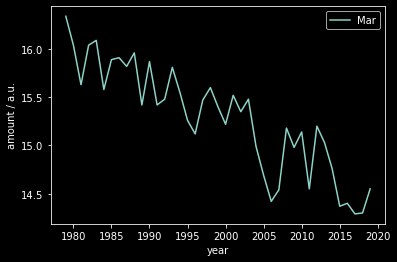

In [11]:
ax = df.plot(x="year", y="Mar", kind="line")
ax.set_ylabel("amount / a.u.")


<AxesSubplot:xlabel='year'>

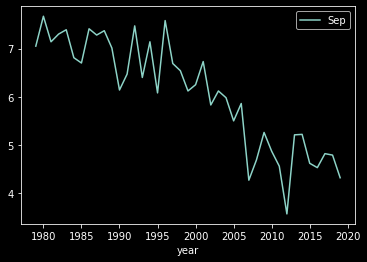

In [12]:
df.plot(x="year", y="Sep", kind="line")

<AxesSubplot:xlabel='year'>

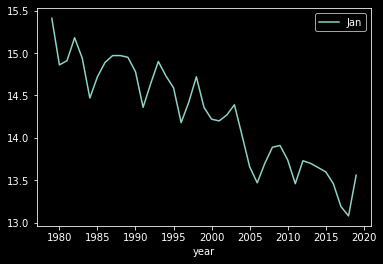

In [13]:
df.plot(x="year", y="Jan", kind="line")


If you recall, we wanted to fit a linear model to this data. For this, we bring scikit-learn to the table.

This is linear_model performs a standard least squares regression, i.e.
given the very general formula $y = w^T*x + b$ where $W$ can be a vector of weights and $b$ can be a vector
we are trying to minimize. In other words, we are trying to find:
    $min_{w,b} |(w^T*x + b) - y|^2$



In [14]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)

Scikit-learn version: 0.23.1


In [15]:
from sklearn import linear_model

ytrain = df[["Mar"]].values
xtrain = df[["year"]].values

model = linear_model.LinearRegression()
model = model.fit(xtrain, ytrain)
print("y = w*x + b = {:2.5f}*x + {:2.5f}".format(model.coef_[0][0],
                                                 model.intercept_[0]))

y = w*x + b = -0.04173*x + 98.69563


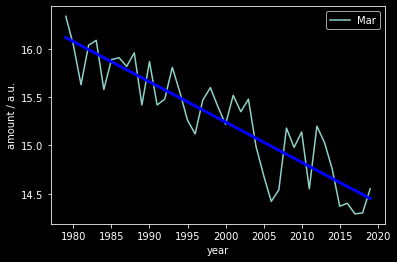

In [16]:
yhat_train = model.predict(df[["year"]].values)

ax = df.plot(x="year", y="Mar", kind="line")
ax.set_ylabel("amount / a.u.")
ax.plot(xtrain, yhat_train, color="blue", linewidth=3)

In [17]:
# before drawing any conclusions, we may want to check by something other than our eye how good our model is
# a solid choice is the mean squared error (MSE) metric as such a goodness-of-fit metric
#      $ MSE = \frac{1}{n} \sum^{n}_{i} (y_i - \hat{y})^2 $
#
# in this case, we stick to something simple as the MSE as it offers a straigth forward
# statistical interpretation, i.e. in the limit of large numbers the expectation value of
# MSE of an estimator $\hat{\theta}$ yields 
#
#      $ \mathcal{E}(\hat{\theta}) = Var_{\theta}(\hat{\theta}) + Bias(\hat{\theta}, \theta)^2
# 

def mse(y_, y_hat):
    """ compute the mean squared error between y (the observations) and y_hat (the prediction) """

    assert y_.shape == y_hat.shape, f"shapes of y_ and y_hat differ: {y_.shape} and {y_hat.shape}"

    return ((y_ - y_hat)**2).sum()/y_.size

score = mse(ytrain, yhat_train)
print(score)


0.06168049587830355


In [18]:
# but of course sklearn offers this as well
from sklearn.metrics import mean_squared_error
score = mean_squared_error(ytrain, yhat_train)
print("MSE = ", score)

# as we (implicetely) assumened normality of the observations around the
# best fit of the linear predictor, we know that the MSE follows a $\chi^2$ distribution
# with n-2 degrees of freedom. Here n is the number of data points we have,
# and we subtract 2 as we were fitting 2 parameters

print(score/(ytrain.size - 2))
# This provides confidence that we produced an unbiased estimate and that
# our variance is extremely low


MSE =  0.06168049587830355
0.0015815511763667576


In [112]:
# when is the ice up in March?
end_of_ice = int(np.round(model.intercept_[0]/(-1*model.coef_[0][0])))
print(end_of_ice)


2365


## Conclusion

Our analysis revealed that the amount of polar surface ice on earth is decreasing with time. 
Given a linear model $y = w*x+b$, the parameters are estimated as follows for 
the amount of ice in March every year: 

- slope $w = -0.04173$
- intercept $b = 98.69563$

Given this model, we expect that there will be no ice in Mar in 2365 the latest. 
A study of uncertainties would need to be conducted subsequently